# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, on=['Mouse ID','Mouse ID'])

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice.
number_mice = len(complete_data.groupby('Mouse ID').count())
number_mice

249

In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f'Number of mice: {number_mice}')
duplicate_mice = complete_data[complete_data.duplicated(['Mouse ID','Timepoint'])]
print(duplicate_mice, sep='\n')

duplicate_mice_id = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

Number of mice: 249
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = complete_data.loc[complete_data['Mouse ID']=='g989']
duplicate_mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[complete_data['Mouse ID'].isin(duplicate_mice_data)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_data.groupby('Mouse ID').count()))

249


## Summary Statistics

In [64]:
grouped_df = clean_data.groupby('Drug Regimen')
grouped_df

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


drug_mean = grouped_df['Tumor Volume (mm3)'].mean()
drug_median = grouped_df['Tumor Volume (mm3)'].median()
drug_var = grouped_df['Tumor Volume (mm3)'].var()
drug_stdev = grouped_df['Tumor Volume (mm3)'].std()
drug_sem = grouped_df['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of eame Stdch drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_results_df = pd.DataFrame({'Mean Tumor Volume': drug_mean,
                               "Median Tumor Volume": drug_median,
                               "Tumor Volume Variance": drug_var,
                               "Tumor Volume St. Dev.": drug_stdev,
                               "Tumor Volume St. Err.": drug_sem})
drug_results_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen on Timepoint'}, xlabel='Drug Regimen'>

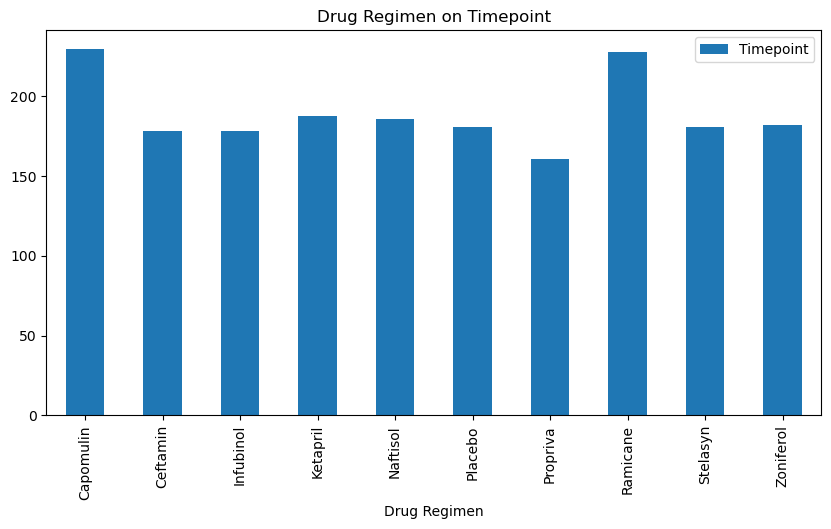

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot_pd = clean_data.groupby(['Drug Regimen']).count()


bar_plot_pd.plot.bar(title='Drug Regimen on Timepoint', y= 'Timepoint', figsize=(10,5))

<function matplotlib.pyplot.show(close=None, block=None)>

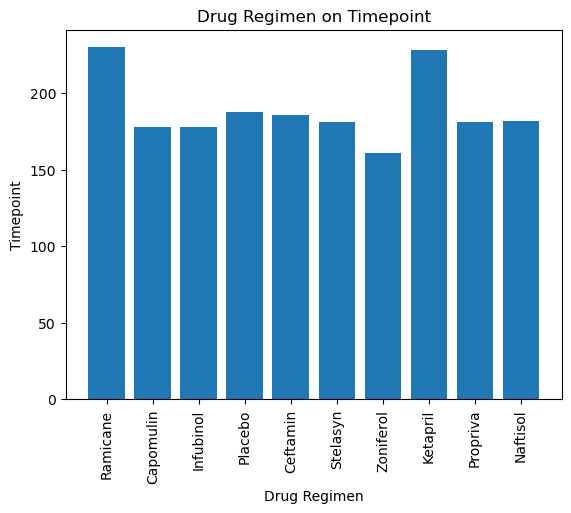

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Establishing X and Y axis
x_axis = clean_data['Drug Regimen'].unique()
y_axis = clean_data.groupby(["Drug Regimen"]).count()['Timepoint']

# Labeling Plot
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.title('Drug Regimen on Timepoint')

# Putting plot together
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, rotation= 90)
plt.show

Text(0, 0.5, '')

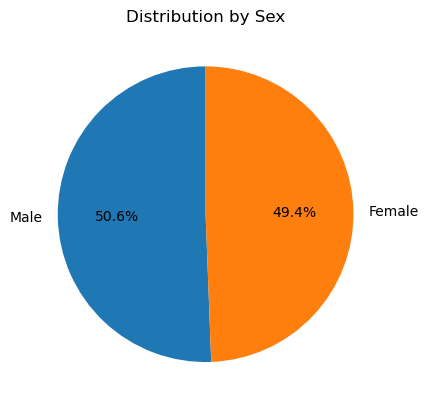

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_data['Sex'].value_counts()

pie_plot = sex_data.plot.pie(autopct='%1.1f%%', startangle=90, title='Distribution by Sex')

pie_plot.set_ylabel("")

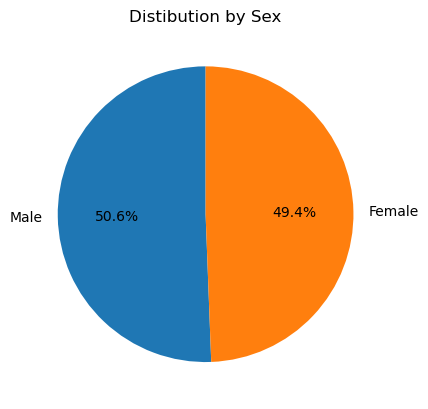

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mice = clean_data["Sex"].value_counts()

plt.pie(sex_mice, labels=sex_mice.index.values, autopct='%1.1f%%', startangle=90)
plt.title("Distibution by Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max().sort_values())
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_data, max_timepoint, on='Mouse ID')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [72]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_values = []

# Create empty list to fill with tumor vol data (for plotting)

for treatment in treatments:
    df = merge_df.loc[merge_df['Drug Regimen'] == treatment]
    final_df = df.loc[df['Timepoint_x'] == df['Timepoint_y']]
    
    values = final_df['Tumor Volume (mm3)']
    treatment_values.append(values)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25, .5, .75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q -lower_q
    print(f"IQR for {treatment}: {iqr}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    print(f"Upper bound for {treatment}: {upper_bound}")
    print(f"Lower bound for {treatment}: {lower_bound}")
    
    # Determine outliers using upper and lower bounds
    amount_of_outliers = (values.loc[(final_df["Tumor Volume (mm3)"] >= upper_bound) |
                         (final_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"{treatment} outliers: {amount_of_outliers}")

IQR for Capomulin: 7.781863460000004
Upper bound for Capomulin: 51.83201549
Lower bound for Capomulin: 20.70456164999999
Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Upper bound for Ramicane: 54.30681135
Lower bound for Ramicane: 17.912664470000003
Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Upper bound for Infubinol: 82.74144559000001
Lower bound for Infubinol: 36.83290494999999
Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Upper bound for Ceftamin: 87.66645829999999
Lower bound for Ceftamin: 25.355449580000002
Ceftamin outliers: 0


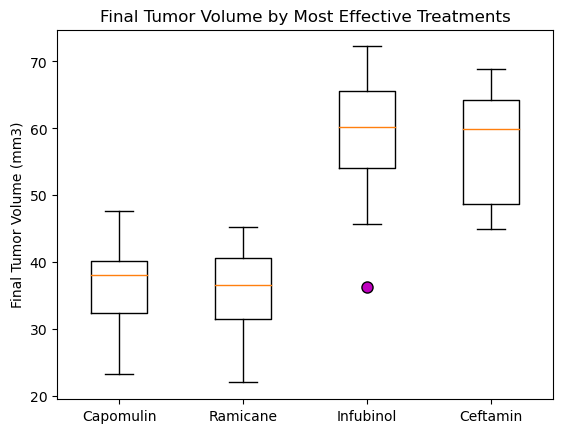

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_elements = dict(marker='o', markerfacecolor= 'm', markersize= 8, markeredgecolor= 'black' )

# Plot box plot
plt.boxplot(treatment_values, flierprops=boxplot_elements)

# Labels and title 
plt.title("Final Tumor Volume by Most Effective Treatments")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] )

plt.show()

## Line and Scatter Plots

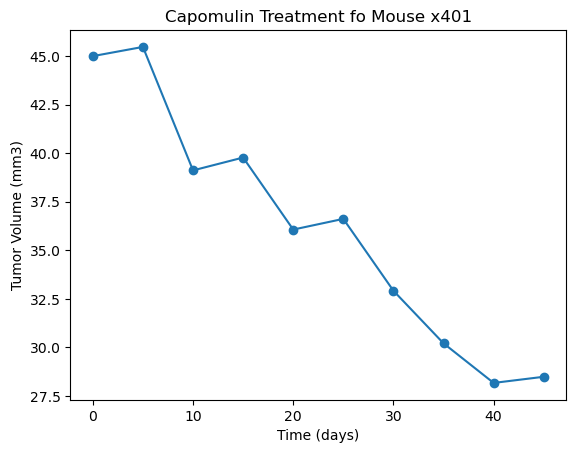

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
little_mouse = clean_data.loc[clean_data['Mouse ID'] == 'x401']

plt.plot(little_mouse['Timepoint'], little_mouse['Tumor Volume (mm3)'], marker= 'o')

# Add labels and titles
plt.title('Capomulin Treatment fo Mouse x401')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

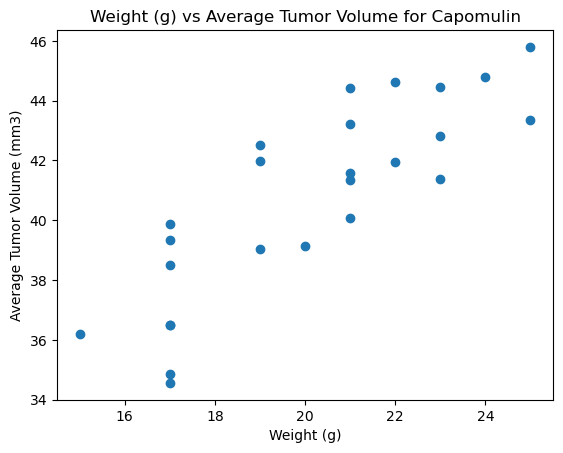

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
cap_scat = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin',:]
cap_avg = cap_scat.groupby(['Mouse ID']).mean(numeric_only=True)

plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight (g) vs Average Tumor Volume for Capomulin')
plt.show()

## Correlation and Regression

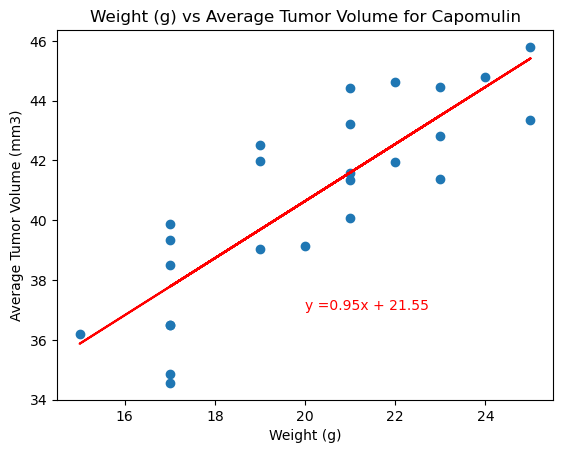

In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

fig1, ax1 = plt.subplots()
cap_scat = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin',:]
cap_avg = cap_scat.groupby(['Mouse ID']).mean(numeric_only=True)

plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
x = cap_avg['Weight (g)']
y = cap_avg['Tumor Volume (mm3)']

correlation = st.pearsonr(x,y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_equation = x * slope + intercept
print_line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, regress_equation, 'r-')

plt.annotate(print_line_eq, (20,37), color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight (g) vs Average Tumor Volume for Capomulin')
plt.show()